In [1]:
# Course - DSC 680 - Applied Data Science 
# Name - Vikas Ranjan
# Final Project 1 - YouTube Video in US
# Date - 6/22/21

## YouTube Videos

### Problem Statement:

YouTube is the world’s second largest search engine and second most visited site after Google. In fact, 37% of all mobile internet traffic belongs to YouTube. It is the second most popular social media platform with almost 1.9bn users. More than 500 hours of video are uploaded to YouTube every minute. We watch over 1 billion hours of YouTube videos a day, more than Netflix and Facebook video combined. It has not only transformed the music industry, but on a broader level it has given power to its views. It has not only become a great alternative to traditional media. Content creators are being paid to create and upload videos which is based on the number of subscribers they have. 
To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions such as number of views, shares, comments and likes. It is remarkable to note that they are not the most-viewed videos overall for the year. Top performers on the YouTube trending list are music videos, celebrity and/or reality TV performances. 

All these facts propelled me to look for and find the dataset which has statistics on YouTube views. The intent of this project is to perform EDA and statistical analysis on the dataset. I’ll also look at various factors that would affect on how popular a YouTube video will be. I’ll also be applying machine learning algorithm to predict if a video will get more than 1M views or not. I’ll also perform sentiment analysis on the comments of these videos. 

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load credit card fraud dataset into a dataframe
USVideos_df = pd.read_csv("USvideos.csv")

# Load the category json file
with open("US_category_id.json") as file: 
    category_res = json.load(file)

cat_dict = {'kind':[],'etag':[],'id':[],'title':[]}
for dict_in in category_res['items']:
    cat_dict['kind'].append(dict_in['kind'])
    cat_dict['etag'].append(dict_in['etag'])
    cat_dict['id'].append(dict_in['id'])
    cat_dict['title'].append(dict_in['snippet']['title'])

cat_df = pd.DataFrame(cat_dict)

In [4]:
# Check the dimension of the data frame
print("The dimension of the table is: ", USVideos_df.shape)

The dimension of the table is:  (40949, 16)


In [5]:
print(USVideos_df.head(5))

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [6]:
# Check the types of each feature
USVideos_df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [7]:
print(cat_df.head(5))

                    kind                                               etag  \
0  youtube#videoCategory  "m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...   
1  youtube#videoCategory  "m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...   
2  youtube#videoCategory  "m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...   
3  youtube#videoCategory  "m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...   
4  youtube#videoCategory  "m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...   

   id             title  
0   1  Film & Animation  
1   2  Autos & Vehicles  
2  10             Music  
3  15    Pets & Animals  
4  17            Sports  


In [8]:
# Check if any missing values
USVideos_df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [9]:
USVideos_df['description']=USVideos_df['description'].fillna("")
USVideos_df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [10]:
# Remove duplicates
USVideos_df.drop_duplicates(inplace = True)

In [11]:
# Format the date/timestamp fields in the dataset
USVideos_df['trending_date'] = pd.to_datetime(USVideos_df['trending_date'],format = '%y.%d.%m')
USVideos_df['publish_time'] = pd.to_datetime(USVideos_df['publish_time'], 
                                         format = '%Y-%m-%dT%H:%M:%S')
USVideos_df

#USVideos_df['trending_date']=pd.to_datetime(pd.Series(USVideos_df['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
#USVideos_df['publish_time']=pd.to_datetime(pd.Series(USVideos_df['publish_time'].apply(lambda x:x[:19])))


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [12]:
# Check the data summary
pd.options.display.float_format = "{:.2f}".format
USVideos_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.00,40901.00,40901.00,40901.00,40901.00
mean,19.97,2360678.04,74271.73,3711.72,8448.57
std,7.57,7397718.73,228999.93,29046.24,37451.39
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,241972.00,5416.00,202.00,613.00
50%,24.00,681064.00,18069.00,630.00,1855.00
75%,25.00,1821926.00,55338.00,1936.00,5752.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


**Below are a few insights from the data:**
- 1. The average number of views of a trending video is 2,360,678. 
- 2. The median value for the number of views is 681,064. That would means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
- 3. The average number of likes of a trending video is 74,271, while the average number of dislikes is 3,711. 
- 4. Average comment count is 8,448 while the median is 1,855.

In [13]:
# Cleanup tag field, place them in a separate dataframe and delete it from original dataframe.
tags_raw_df = USVideos_df[['video_id','tags']].copy()
tags_raw_df['tags'] = tags_raw_df['tags'].str.split('|')
tags_df = tags_raw_df.explode('tags').reset_index(drop = True)

# Remove quotation marks for some tags. 
mask_cond = (tags_df['tags'].astype(str).str[0] == '"') & (tags_df['tags'].astype(str).str[-1] == '"')
tags_df['tags'] = tags_df['tags'].where(~mask_cond,tags_df['tags'].astype(str).str[1:-1])

In [14]:
# Remove tag
del USVideos_df['tags']
USVideos_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [15]:
# Add a new field category name 
USVideos_df['category_name'] = np.nan
USVideos_df.loc[(USVideos_df["category_id"] == 1),"category_name"] = 'Film and Animation'
USVideos_df.loc[(USVideos_df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
USVideos_df.loc[(USVideos_df["category_id"] == 10),"category_name"] = 'Music'
USVideos_df.loc[(USVideos_df["category_id"] == 15),"category_name"] = 'Pets and Animals'
USVideos_df.loc[(USVideos_df["category_id"] == 17),"category_name"] = 'Sport'
USVideos_df.loc[(USVideos_df["category_id"] == 19),"category_name"] = 'Travel and Events'
USVideos_df.loc[(USVideos_df["category_id"] == 20),"category_name"] = 'Gaming'
USVideos_df.loc[(USVideos_df["category_id"] == 22),"category_name"] = 'People and Blogs'
USVideos_df.loc[(USVideos_df["category_id"] == 23),"category_name"] = 'Comedy'
USVideos_df.loc[(USVideos_df["category_id"] == 24),"category_name"] = 'Entertainment'
USVideos_df.loc[(USVideos_df["category_id"] == 25),"category_name"] = 'News and Politics'
USVideos_df.loc[(USVideos_df["category_id"] == 26),"category_name"] = 'How to and Style'
USVideos_df.loc[(USVideos_df["category_id"] == 27),"category_name"] = 'Education'
USVideos_df.loc[(USVideos_df["category_id"] == 28),"category_name"] = 'Science and Technology'
USVideos_df.loc[(USVideos_df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
USVideos_df.loc[(USVideos_df["category_id"] == 43),"category_name"] = 'Shows'

In [16]:
USVideos_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [17]:
#USVideos_df['category_id']= USVideos_df['category_id'].astype(int)
#cat_df['id']= cat_df['id'].astype(int)
#USVideos_df = pd.merge(USVideos_df,cat_df, left_on ='category_id', right_on = 'id')

In [18]:
USVideos_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


### Graph Analysis

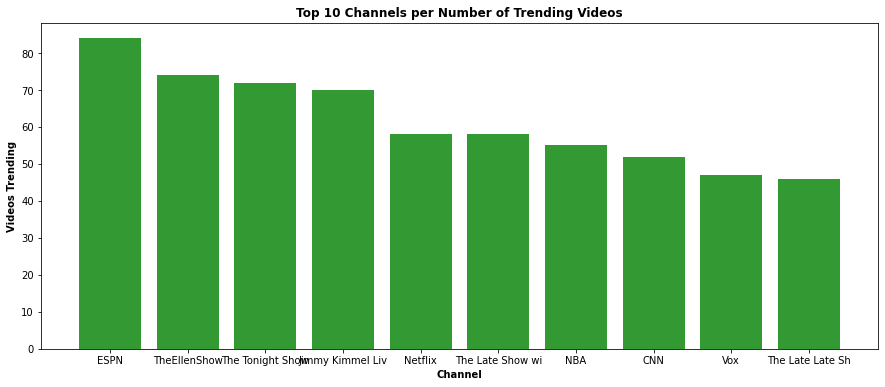

In [19]:
# Find out Top 10 channels
channel_df = USVideos_df[['channel_title','video_id']].groupby('channel_title', as_index = False).nunique().nlargest(10, columns = 'video_id')

fig = plt.figure(1,[15,6])
x = fig.add_subplot(1,1,1)
x.bar(channel_df['channel_title'], channel_df['video_id'], alpha = 0.8, color = 'g')
labels = channel_df['channel_title'].str[:16]
x.set_xticklabels(labels = labels)
x.set_title('Top 10 Channels per Number of Trending Videos', fontweight = "bold")
x.set_xlabel('Channel', fontweight = "bold")
x.set_ylabel('Videos Trending', fontweight = "bold")
plt.setp(x.get_xticklabels(), fontsize = 10)
plt.show()

**This graph shows the top 10 channels which have greatest number of trending videos on YouTube.**

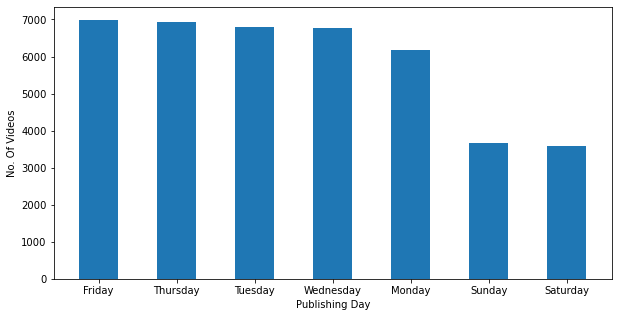

In [57]:
# Check the days of the week when most uploads happen
publish_days_df = USVideos_df['publish_time'].dt.day_name()
publish_days_dict = (publish_days_df.value_counts()).to_dict()
count= pd.DataFrame(list(publish_days_dict.items()),columns = ['Publishing Day','No. Of Videos']) 
fig = plt.figure(figsize=(10,5))
plt.bar(count['Publishing Day'],count['No. Of Videos'],width = 0.5)
plt.xlabel("Publishing Day")
plt.ylabel("No. Of Videos")
plt.show()

**Here we can see the days of the week which had the largest numbers of trending videos. There is a trend that on weekends, there are lesser videos being uploaded**

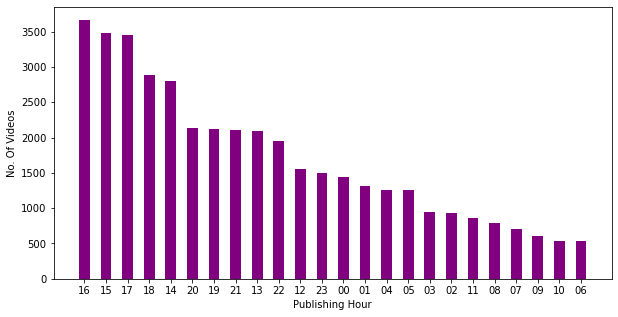

In [21]:
# Check the trend with the publishing times
pubtime_df = USVideos_df.publish_time.apply(lambda x: x.strftime("%H"))
pubtime_dict = (pubtime_df.value_counts()).to_dict()
count = pd.DataFrame(list(pubtime_dict.items()),columns = ['Publishing Hour','No. Of Videos']) 
fig = plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No. Of Videos'],color=['purple'],width = 0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No. Of Videos")
plt.show()

**Here we can see the trend that most of the videos are being uploaded between 14:00 and 16:00, highest number of videos being uploaded are around 16:00.**

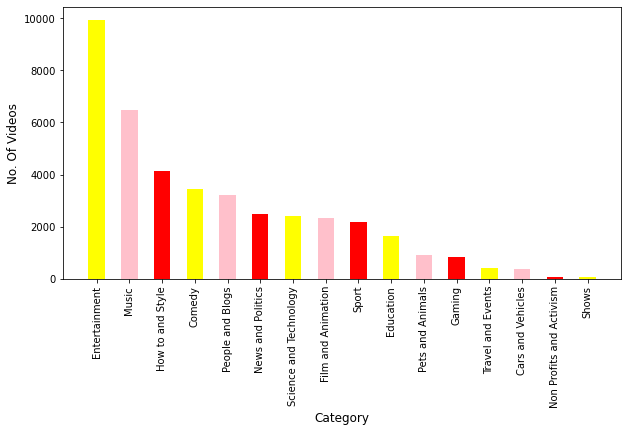

In [56]:
# Plot the number of videos across all categories
cat_dict = (USVideos_df['category_name'].value_counts()).to_dict()
count = pd.DataFrame(list(cat_dict.items()),columns = ['Category','No. Of Videos']) 
fig = plt.figure(figsize=(10,5))
plt.bar(count['Category'],count['No. Of Videos'],color = ['yellow', 'pink', 'red'],width=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Category",size=12)
plt.ylabel("No. Of Videos",size=12)
plt.show()

**Above plot shows that the Entertainment category contains the largest number of trending videos with around 10,000 videos, second is Music category with around 6,200 videos, followed by How to & Style category with around 4,100 videos.**

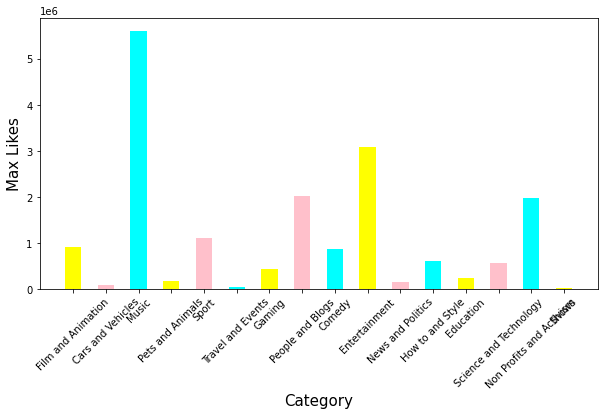

In [23]:
cat_df = USVideos_df.groupby('category_id')
cat_likes_df = cat_df['category_name','likes'].max()
fig = plt.figure(figsize=(10,5))
plt.bar(cat_likes_df['category_name'],cat_likes_df['likes'],color=['yellow', 'pink', 'cyan'],width=0.5)
plt.xticks(rotation=45)
plt.xlabel("Category",size=15)
plt.ylabel("Max Likes",size=15)
plt.show()

**As we can see in above plot, Music and entertainment videos have most likes.**                                           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'People and Blogs'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Science and Technology'),
  Text(4, 0, 'Film and Animation'),
  Text(5, 0, 'News and Politics'),
  Text(6, 0, 'Sport'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Pets and Animals'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'How to and Style'),
  Text(11, 0, 'Cars and Vehicles'),
  Text(12, 0, 'Travel and Events'),
  Text(13, 0, 'Gaming'),
  Text(14, 0, 'Non Profits and Activism'),
  Text(15, 0, 'Shows')])

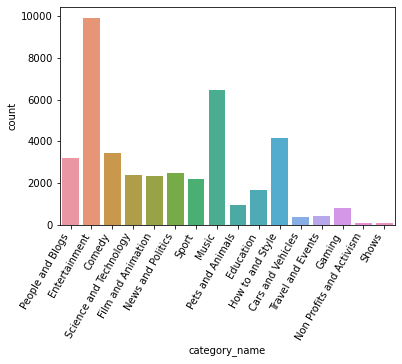

In [24]:
sns.countplot(x=USVideos_df['category_name'])
plt.xticks(rotation=60, horizontalalignment='right')

**Most of the videos are in the category of 'Entertainment', 'Music', then followed by 'How to and style'.** 

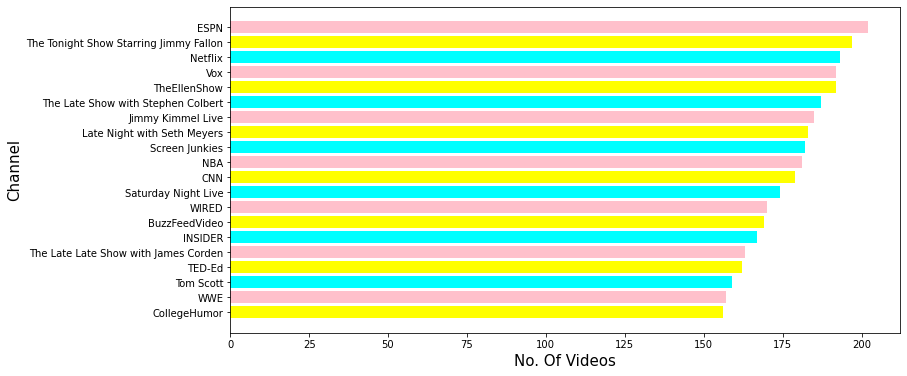

In [25]:
# Check channels with highest vidoes. 
channel_df = USVideos_df.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
channel_sorted= channel_df.sort_values('video_count')
fig = plt.figure(figsize=(12,6))
plt.barh(channel_sorted['channel_title'],channel_sorted['video_count'],color=['yellow', 'pink', 'cyan'])
plt.xlabel("No. Of Videos",size=15)
plt.ylabel("Channel",size=15)
plt.show()

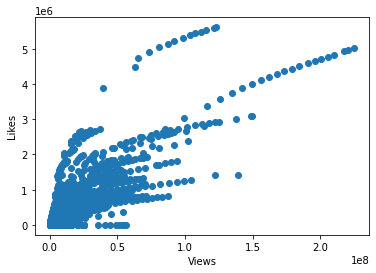

In [26]:
# Scatterplot of views vs likes
plt.scatter(USVideos_df['views'],USVideos_df['likes'])
plt.xlabel("Views",size=10)
plt.ylabel("Likes",size=10)
plt.show()

**Based on the above scatterplot, there seems to be positive coorelation between the no of views and the no of likes of a video.**

In [27]:
# Correlation between views and likes, dislikes adn comments
USVideos_corr_df = USVideos_df[['video_id', 'views', 'likes', 'comment_count','dislikes']].groupby('video_id').max()

print('Correlation between views and likes:', USVideos_corr_df['views'].corr(USVideos_corr_df['likes']))
print('Correlation between views and dislikes:', USVideos_corr_df['views'].corr(USVideos_corr_df['dislikes']))
print('Correlation between views and comment counts:', USVideos_corr_df['views'].corr(USVideos_corr_df['comment_count']))

Correlation between views and likes: 0.8346970361835458
Correlation between views and dislikes: 0.44192434441905837
Correlation between views and comment counts: 0.5748897619674475


In [28]:
# Correlation Matrix 
corr_columns = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = USVideos_df[corr_columns].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.00,0.85,0.47,0.62
likes,0.85,1.00,0.45,0.80
dislikes,0.47,0.45,1.00,0.70
comment_count,0.62,0.80,0.70,1.00


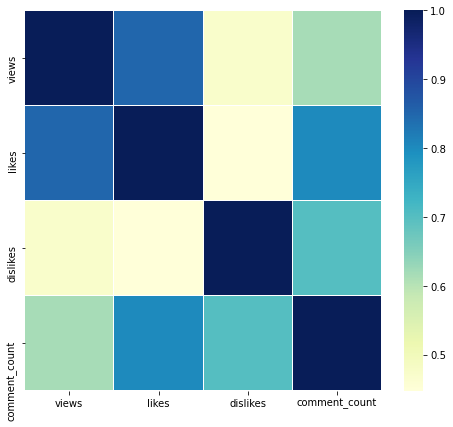

In [29]:
plt.figure(figsize = (8,7)) 
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,linewidths=.1,cmap="YlGnBu") 
plt.show()

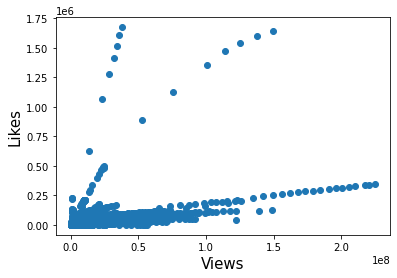

In [30]:
plt.scatter(USVideos_df['views'],USVideos_df['dislikes'])
plt.xlabel("Views",size=15)
plt.ylabel("Likes",size=15)
plt.show()

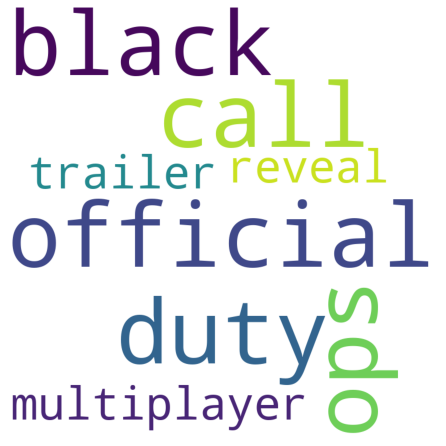

In [31]:
# Final word cloud after all the cleaning and pre-processing

comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in USVideos_df.title: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Convert each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


### Train and Test 

In [32]:
channels_df = USVideos_df.channel_title.value_counts()
channels_df = channels_df[channels_df > 50]
titles=list(channels_df.index)
titles

['ESPN',
 'The Tonight Show Starring Jimmy Fallon',
 'Netflix',
 'Vox',
 'TheEllenShow',
 'The Late Show with Stephen Colbert',
 'Jimmy Kimmel Live',
 'Late Night with Seth Meyers',
 'Screen Junkies',
 'NBA',
 'CNN',
 'Saturday Night Live',
 'WIRED',
 'BuzzFeedVideo',
 'INSIDER',
 'The Late Late Show with James Corden',
 'TED-Ed',
 'Tom Scott',
 'WWE',
 'CollegeHumor',
 'First We Feast',
 'HellthyJunkFood',
 'Bon Appétit',
 'Tasty',
 'Warner Bros. Pictures',
 'FBE',
 'Life Noggin',
 'jacksfilms',
 'Good Mythical Morning',
 'The King of Random',
 'Vanity Fair',
 'Vogue',
 'Safiya Nygaard',
 'SciShow',
 '20th Century Fox',
 'Smosh',
 'Dude Perfect',
 'Marques Brownlee',
 'Great Big Story',
 'Marvel Entertainment',
 'AsapSCIENCE',
 'NFL',
 'ABC News',
 'The Slow Mo Guys',
 'The Voice',
 'James Charles',
 'Washington Post',
 'Kurzgesagt – In a Nutshell',
 "Simon's Cat",
 'CrazyRussianHacker',
 'Binging with Babish',
 'NikkieTutorials',
 'Complex',
 'E! Entertainment',
 'You Suck At Cooking

In [33]:
# Remove the non-numeric fields from the dataset
model_data_df = USVideos_df[USVideos_df['channel_title'].isin(titles)]
model_data_df = model_data_df.reset_index()
model_data_df.drop(['index','video_id','trending_date','title','category_id','thumbnail_link','description','publish_time'],axis=1,inplace=True)
model_data_df

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,CaseyNeistat,748374,57527,2966,15954,False,False,False,People and Blogs
1,Rudy Mancuso,3191434,146033,5339,8181,False,False,False,Comedy
2,Good Mythical Morning,343168,10172,666,2146,False,False,False,Entertainment
3,nigahiga,2095731,132235,1989,17518,False,False,False,Entertainment
4,iJustine,119180,9763,511,1434,False,False,False,Science and Technology
...,...,...,...,...,...,...,...,...,...
18763,Saturday Night Live,8607264,66559,14179,8382,False,False,False,Entertainment
18764,Lucas the Spider,8300584,266267,4237,14617,False,False,False,Film and Animation
18765,The Graham Norton Show,5564576,46351,2295,2861,False,False,False,Entertainment
18766,BuzzFeed Celeb,8259128,645888,4052,62610,False,False,False,People and Blogs


In [34]:
le = LabelEncoder()
for i in USVideos_df.columns:
    if i in ['channel_title','comments_disabled','ratings_disabled','video_error_or_removed','category_name',
           'contains_capitalized']:
        model_data_df[i] = le.fit_transform(model_data_df[i])
model_data_df

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,32,748374,57527,2966,15954,0,0,0,10
1,130,3191434,146033,5339,8181,0,0,0,1
2,60,343168,10172,666,2146,0,0,0,3
3,201,2095731,132235,1989,17518,0,0,0,3
4,196,119180,9763,511,1434,0,0,0,12
...,...,...,...,...,...,...,...,...,...
18763,133,8607264,66559,14179,8382,0,0,0,3
18764,98,8300584,266267,4237,14617,0,0,0,4
18765,159,5564576,46351,2295,2861,0,0,0,3
18766,22,8259128,645888,4052,62610,0,0,0,10


In [35]:
# Train and test data for likes prediction
X = model_data_df.drop('likes',axis=1)
y = model_data_df.likes

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (15014, 8)
X_test:  (3754, 8)
y_train:  (15014,)
y_test:  (3754,)


In [37]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=model.predict(X_test)

In [39]:
y_pred

array([20868.87263548, 43712.38569444, 25658.16794001, ...,
       28844.77999901, 19147.65185704, 76474.84766887])

In [40]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,model.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,y_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,model.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,y_pred))

Mean Absolute Error on Training Set:  31286.584478196557
Mean Absolute Error on Testing Set:  28314.906338538465
R-Squared Score on Training Set:  0.8780185679074064
R-Squared Score on Testing Set:  0.898879735911307


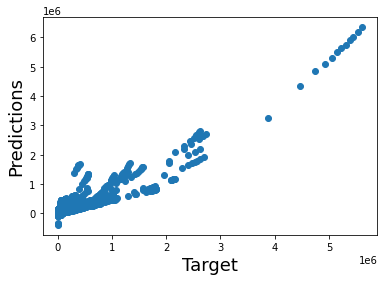

In [41]:
# Plot the results of the model prediction
y_pred_train = model.predict(X_train)
plt.scatter(y_train,y_pred_train)
plt.xlabel('Target', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.show()


**Linear regression results shows that r-squared score of 0.89 which seems to be accurate.**

In [42]:
# Train and test data for views prediction
X = model_data_df.drop('views',axis=1)
y = model_data_df.views

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (15014, 8)
X_test:  (3754, 8)
y_train:  (15014,)
y_test:  (3754,)


In [44]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(X_test)

In [46]:
y_pred

array([1210401.37045121, 1443890.04851035, 1333139.6684112 , ...,
        884021.2381098 ,  875305.11462055, 2508419.06826074])

In [47]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,model.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,y_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,model.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,y_pred))

Mean Absolute Error on Training Set:  1008276.9374112653
Mean Absolute Error on Testing Set:  936354.1332232057
R-Squared Score on Training Set:  0.7579167271863829
R-Squared Score on Testing Set:  0.7803572918802018


**Linear regression results shows that r-squared score of 0.76 which is not accurate enough and had scope for improvements. Therefore, we will apply Random Forest Regressor model and evaluate if it is a better fit to predict number of views.**

**Random Forest Regressor**

In [48]:
model_data_df.head()

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,32,748374,57527,2966,15954,0,0,0,10
1,130,3191434,146033,5339,8181,0,0,0,1
2,60,343168,10172,666,2146,0,0,0,3
3,201,2095731,132235,1989,17518,0,0,0,3
4,196,119180,9763,511,1434,0,0,0,12


In [49]:
x1=model_data_df.drop(['views'],axis=1)
y1=model_data_df['views']

In [50]:
x_train1, x_test1, y_train1, y_test1=train_test_split(x1,y1, test_size=0.2,random_state=42)

In [51]:
model =RandomForestRegressor(n_estimators=300, random_state=30)
model.fit(x_train1, y_train1)

RandomForestRegressor(n_estimators=300, random_state=30)

In [52]:
y_hat_test1 = model.predict(x_test1)
mae = mean_absolute_error(y_test1, y_hat_test1)
print(mae)

220924.74722834092


**Random Forest Regressor model to predict number of views has a mean absolute error (MAE) of 220924. That means that 220924 is the amount of error in your measurements. It very much represents the difference between the measured value and “true” value.**

In [53]:
model.score(x_test1, y_test1)

0.985254371925356

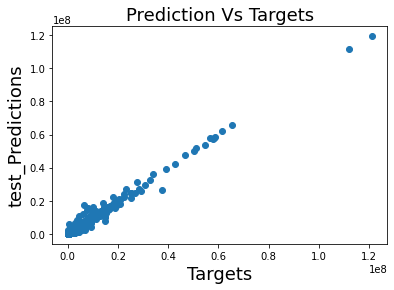

In [54]:
plt.scatter(x=y_test1, y=y_hat_test1)
plt.xlabel('Targets', fontsize=18)
plt.ylabel('test_Predictions', fontsize=18)
plt.title('Prediction Vs Targets',fontsize=18)
plt.show()